In [2]:
pip install imblearn

  Using cached imblearn-0.0-py2.py3-none-any.whl (1.9 kB)
     -------------------------------------- 226.0/226.0 kB 4.6 MB/s eta 0:00:00
  Using cached joblib-1.2.0-py3-none-any.whl (297 kB)
  Attempting uninstall: joblib
    Found existing installation: joblib 1.1.0
    Uninstalling joblib-1.1.0:
      Successfully uninstalled joblib-1.1.0
Note: you may need to restart the kernel to use updated packages.


In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plot
import seaborn as sns
from sklearn.utils import resample
from imblearn.over_sampling import SMOTENC,RandomOverSampler, KMeansSMOTE
from sklearn.impute import KNNImputer
from sklearn.preprocessing import LabelEncoder
sns.set()


In [6]:
data = pd.read_csv('inputFile.csv')

In [7]:
data.shape

(7544, 30)

In [8]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
0,41,F,f,f,f,f,f,f,f,f,...,t,125.0,t,1.14,t,109.0,f,?,SVHC,negative
1,23,F,f,f,f,f,f,f,f,f,...,t,102.0,f,?,f,?,f,?,other,negative
2,46,M,f,f,f,f,f,f,f,f,...,t,109.0,t,0.91,t,120.0,f,?,other,negative
3,70,F,t,f,f,f,f,f,f,f,...,t,175.0,f,?,f,?,f,?,other,negative
4,70,F,f,f,f,f,f,f,f,f,...,t,61.0,t,0.87,t,70.0,f,?,SVI,negative


In [9]:
data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,TT4_measured,TT4,T4U_measured,T4U,FTI_measured,FTI,TBG_measured,TBG,referral_source,Class
count,7544,7544,7544,7544,7544,7544,7544,7544,7544,7544,...,7544,7544,7544,7544,7544,7544,7544,7544,7544,7544
unique,94,3,2,2,2,2,2,2,2,2,...,2,242,2,147,2,235,1,1,5,4
top,59,F,f,f,f,f,f,f,f,f,...,t,?,t,?,t,?,f,?,other,negative
freq,190,4960,6616,7444,7458,7250,7438,7438,7426,7076,...,7082,462,6770,774,6774,770,7544,7544,4402,6962


In [11]:
for column in data.columns:
    count = data[column][data[column] == '?'].count()
    if count!=0:
        print(column,data[column][data[column]=='?'].count())

age 2
sex 300
TSH 738
T3 1538
TT4 462
T4U 774
FTI 770
TBG 7544


In [12]:
data = data.drop(['TBG'],axis = 1)

In [13]:
data[['T4U_measured','T4U']]

,T4U_measured,T4U
0,t,1.14
1,f,?
2,t,0.91
3,f,?
4,t,0.87
...,...,...
7539,f,?
7540,t,1.08
7541,t,1.07
7542,t,0.94


In [17]:
data = data.drop(['TSH_measured', 'T3_measured', 'TT4_measured', 'T4U_measured', 'FTI_measured', 'TBG_measured', 'TSH'],axis=1)

In [20]:
# Now we are replacing the '?' values with numpy nan

for column in data.columns:
    count = data[column][data[column] == '?'].count()
    if count!=0:
        data[column] = data[column].replace('?', np.nan)



In [22]:
for column in data.columns:
    count = data[column][data[column] == '?'].count()
    if count==0:
        print(column, data[column][data[column] == '?'].count())

age 0
sex 0
on_thyroxine 0
query_on_thyroxine 0
on_antithyroid_medication 0
sick 0
pregnant 0
thyroid_surgery 0
I131_treatment 0
query_hypothyroid 0
query_hyperthyroid 0
lithium 0
goitre 0
tumor 0
hypopituitary 0
psych 0
T3 0
TT4 0
T4U 0
FTI 0
referral_source 0
Class 0


In [23]:
data.isna().sum()

age                             2
sex                           300
on_thyroxine                    0
query_on_thyroxine              0
on_antithyroid_medication       0
sick                            0
pregnant                        0
thyroid_surgery                 0
I131_treatment                  0
query_hypothyroid               0
query_hyperthyroid              0
lithium                         0
goitre                          0
tumor                           0
hypopituitary                   0
psych                           0
T3                           1538
TT4                           462
T4U                           774
FTI                           770
referral_source                 0
Class                           0
dtype: int64

In [24]:

# Encoding/ Mapping categorical values

data['sex'] = data['sex'].map({'F': 0, 'M': 1})

In [25]:

# Except for 'Sex' column all the other columns with two categorical data have same value 'f' and 't'
# Hence mapping all the columns at once below

for column in data.columns:
         if len(data[column].unique()) == 2:
             data[column] = data[column].map({'f': 0, 't': 1})

In [26]:
data['referral_source'].unique()

array(['SVHC', 'other', 'SVI', 'STMW', 'SVHD'], dtype=object)

In [28]:
# we will use get_dummies function 

data = pd.get_dummies(data, columns = ['referral_source'], drop_first = True)

In [30]:
# for output column we use label encoder as this variable 4 distinct values 
# And we need this in prediction in the form of pickle file to decode

data['Class'].unique()

array(['negative', 'compensated_hypothyroid', 'primary_hypothyroid',
       'secondary_hypothyroid'], dtype=object)

In [35]:
label_encoder = LabelEncoder()
data['Class'] = label_encoder.fit_transform(data['Class'])

In [36]:
data.head()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
0,41,0.0,0,0,0,0,0,0,0,0,...,0,2.5,125.0,1.14,109.0,1,1,0,0,0
1,23,0.0,0,0,0,0,0,0,0,0,...,0,2.0,102.0,NaN,NaN,1,0,0,0,1
2,46,1.0,0,0,0,0,0,0,0,0,...,0,NaN,109.0,0.91,120.0,1,0,0,0,1
3,70,0.0,1,0,0,0,0,0,0,0,...,0,1.9,175.0,NaN,NaN,1,0,0,0,1
4,70,0.0,0,0,0,0,0,0,0,0,...,0,1.2,61.0,0.87,70.0,1,0,0,1,0


In [37]:
data.describe(include = 'all')

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,7542,7244.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,...,7544.000000,6006,7082,6770,6774,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000
unique,93,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,69,241,146,234,NaN,NaN,NaN,NaN,NaN
top,59,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,2.0,101.0,0.99,100.0,NaN,NaN,NaN,NaN,NaN
freq,190,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,476,142,190,146,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.315295,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.048780,NaN,NaN,NaN,NaN,0.974814,0.102333,0.010339,0.274125,0.583510
std,NaN,0.464665,0.328472,0.114375,0.106167,0.193540,0.117709,0.117709,0.124093,0.241237,...,0.215423,NaN,NaN,NaN,NaN,0.279489,0.303106,0.101162,0.446102,0.493009
min,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,0.000000,0.000000,0.000000,0.000000,0.000000
25%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,0.000000
50%,NaN,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,0.000000,1.000000
75%,NaN,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,NaN,NaN,NaN,NaN,1.000000,0.000000,0.000000,1.000000,1.000000


In [39]:
imputer = KNNImputer(n_neighbors = 3, weights = 'uniform', missing_values = np.nan)
new_array = imputer.fit_transform(data) # impute the missing values

#convert the nd-array returned in the step above to a Dataframe
new_data = pd.DataFrame(data = np.round(new_array), columns = data.columns)

In [40]:
new_data.describe()

,age,sex,on_thyroxine,query_on_thyroxine,on_antithyroid_medication,sick,pregnant,thyroid_surgery,I131_treatment,query_hypothyroid,...,psych,T3,TT4,T4U,FTI,Class,referral_source_SVHC,referral_source_SVHD,referral_source_SVI,referral_source_other
count,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,...,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000,7544.000000
mean,51.737275,0.312036,0.123012,0.013256,0.011400,0.038971,0.014051,0.014051,0.015642,0.062036,...,0.048780,2.028632,108.346766,1.020679,110.191676,0.974814,0.102333,0.010339,0.274125,0.583510
std,20.081147,0.463355,0.328472,0.114375,0.106167,0.193540,0.117709,0.117709,0.124093,0.241237,...,0.215423,0.798200,34.955870,0.166367,32.310211,0.279489,0.303106,0.101162,0.446102,0.493009
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,2.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,36.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,88.000000,1.000000,93.000000,1.000000,0.000000,0.000000,0.000000,0.000000
50%,54.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,104.000000,1.000000,107.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,67.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,2.000000,124.000000,1.000000,124.000000,1.000000,0.000000,0.000000,1.000000,1.000000
max,455.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,11.000000,430.000000,2.000000,395.000000,3.000000,1.000000,1.000000,1.000000,1.000000


In [41]:
new_data.isna().sum()

age                          0
sex                          0
on_thyroxine                 0
query_on_thyroxine           0
on_antithyroid_medication    0
sick                         0
pregnant                     0
thyroid_surgery              0
I131_treatment               0
query_hypothyroid            0
query_hyperthyroid           0
lithium                      0
goitre                       0
tumor                        0
hypopituitary                0
psych                        0
T3                           0
TT4                          0
T4U                          0
FTI                          0
Class                        0
referral_source_SVHC         0
referral_source_SVHD         0
referral_source_SVI          0
referral_source_other        0
dtype: int64

C:\Users\NAGARAJ TRIKONA\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

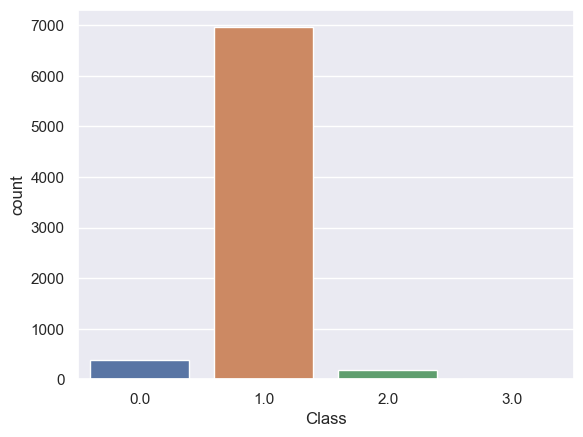

In [49]:
sns.countplot(new_data['Class'])